In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# RK changed

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dname, filename))

riz = pd.read_csv(r'C:\\Users\\Asus\\Downloads\\insurance.csv')
print(riz.to_string())
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

      age     sex     bmi  children smoker     region       charges
0      19  female  27.900         0    yes  southwest  16884.924000
1      18    male  33.770         1     no  southeast   1725.552300
2      28    male  33.000         3     no  southeast   4449.462000
3      33    male  22.705         0     no  northwest  21984.470610
4      32    male  28.880         0     no  northwest   3866.855200
5      31  female  25.740         0     no  southeast   3756.621600
6      46  female  33.440         1     no  southeast   8240.589600
7      37  female  27.740         3     no  northwest   7281.505600
8      37    male  29.830         2     no  northeast   6406.410700
9      60  female  25.840         0     no  northwest  28923.136920
10     25    male  26.220         0     no  northeast   2721.320800
11     62  female  26.290         0    yes  southeast  27808.725100
12     23    male  34.400         0     no  southwest   1826.843000
13     56  female  39.820         0     no  sout

Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

Can you accurately predict insurance cost?

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
riz = pd.read_csv(r'C:\\Users\\Asus\\Downloads\\insurance.csv')

In [4]:
# first 5 rows of the dataframe
riz.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
riz.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
riz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [7]:
# checking for missing values
riz.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [8]:
# statistical Measures of the dataset
riz.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


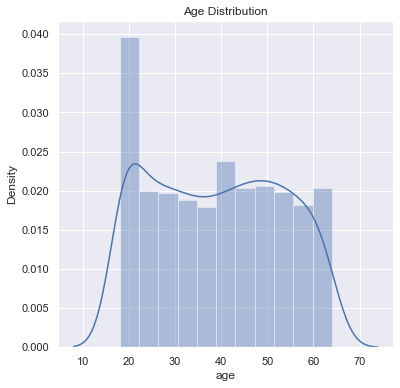

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(riz['age'])
plt.title('Age Distribution')
plt.show()

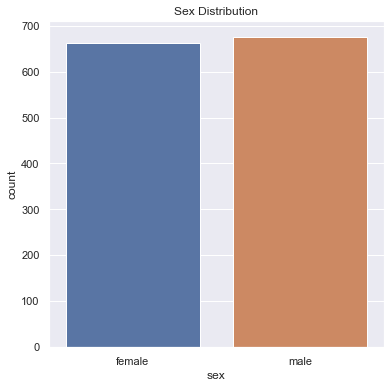

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=riz)
plt.title('Sex Distribution')
plt.show()

In [11]:
riz['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


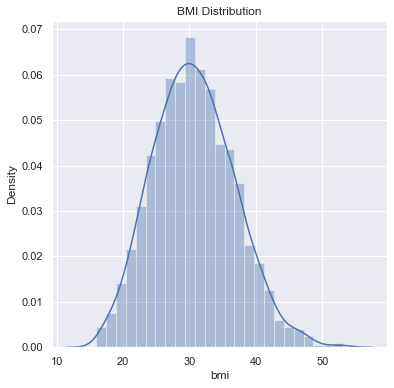

In [12]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(riz['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

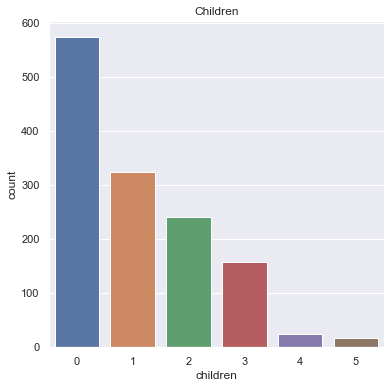

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=riz)
plt.title('Children')
plt.show()

In [14]:
riz['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

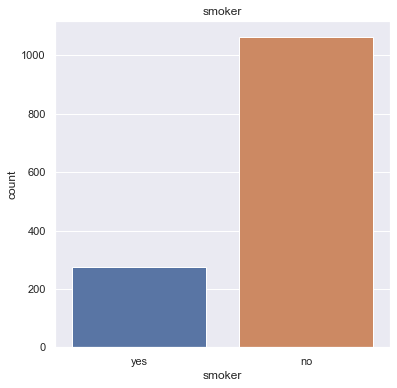

In [15]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=riz)
plt.title('smoker')
plt.show()

In [16]:
riz['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

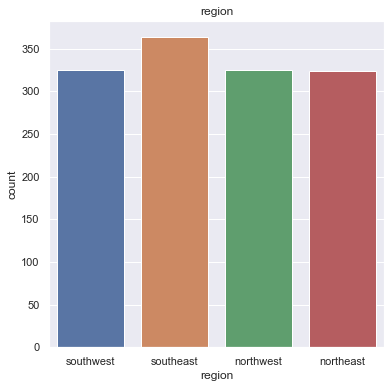

In [17]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=riz)
plt.title('region')
plt.show()

In [18]:
riz['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


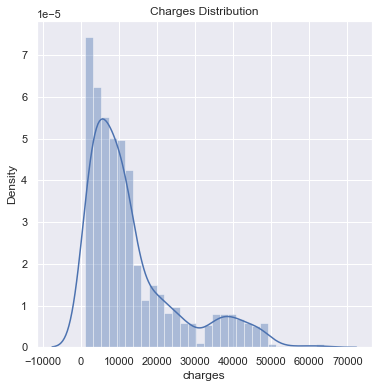

In [19]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(riz['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [20]:
# encoding sex column

riz.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
riz.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
riz.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


Splitting the Features and Target

In [21]:
X = riz.drop(columns='charges', axis=1)
Y = riz['charges']

In [22]:
print(X.to_string())

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
5      31    1  25.740         0       1       0
6      46    1  33.440         1       1       0
7      37    1  27.740         3       1       3
8      37    0  29.830         2       1       2
9      60    1  25.840         0       1       3
10     25    0  26.220         0       1       2
11     62    1  26.290         0       0       0
12     23    0  34.400         0       1       1
13     56    1  39.820         0       1       0
14     27    0  42.130         0       0       0
15     19    0  24.600         1       1       1
16     52    1  30.780         1       1       2
17     23    0  23.845         0       1       2
18     56    0  40.300         0       1       1
19     30    0  35.3

In [23]:
print(Y.to_string())

0       16884.924000
1        1725.552300
2        4449.462000
3       21984.470610
4        3866.855200
5        3756.621600
6        8240.589600
7        7281.505600
8        6406.410700
9       28923.136920
10       2721.320800
11      27808.725100
12       1826.843000
13      11090.717800
14      39611.757700
15       1837.237000
16      10797.336200
17       2395.171550
18      10602.385000
19      36837.467000
20      13228.846950
21       4149.736000
22       1137.011000
23      37701.876800
24       6203.901750
25      14001.133800
26      14451.835150
27      12268.632250
28       2775.192150
29      38711.000000
30      35585.576000
31       2198.189850
32       4687.797000
33      13770.097900
34      51194.559140
35       1625.433750
36      15612.193350
37       2302.300000
38      39774.276300
39      48173.361000
40       3046.062000
41       4949.758700
42       6272.477200
43       6313.759000
44       6079.671500
45      20630.283510
46       3393.356350
47       3556

Splitting the data into Training data & Testing Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [25]:
# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [26]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [27]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


Building a Predictive System

In [28]:
input_1=[]
age=int(input("Enter the age"))
input_1.append(age)
sex=bool(input("Enter the gender(0-Male,1-Female)"))
input_1.append(sex)
BMI=float(input("Enter the BMI"))
input_1.append(BMI)
child=int(input("Enter the no of children"))
input_1.append(child)
smoker=bool(input("Enter are you a smoker (0-yes,1-no)"))
input_1.append(smoker)
region=int(input("Enter the region: (southeast':0,'southwest':1,'northeast':2,'northwest':3"))
input_1.append(region)
#input_data = (34,1,25.74,0,1,0)
input_data=tuple(input_1)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

# print('The insurance cost is USD ', prediction[0])
# Taking prediction value to USD for change it to INR
usd=prediction[0]
inr = usd * 83

print("The currency in INR is",round(inr,2))


Enter the age19
Enter the gender(0-Male,1-Female)1
Enter the BMI23
Enter the no of children3
Enter are you a smoker (0-yes,1-no)1
Enter the region: (southeast':0,'southwest':1,'northeast':2,'northwest':31
[1790.29363105]
The currency in INR is 148594.37


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
